In [192]:
import numpy as np

#Data
data_xtest = np.load('Xtest_Regression_Part2.npy')
data_xtrain = np.load('Xtrain_Regression_Part2.npy')
data_ytrain = np.load('Ytrain_Regression_Part2.npy')

In [216]:
#Outliers with Z-Score
from scipy import stats

z = np.abs(stats.zscore(data_xtrain))
print(z)
print(np.where(z > 3))#Usually 3
print(np.where(z > 2))

[[1.26690269 0.06811131 0.25209475 ... 0.19570738 1.55899453 0.05378977]
 [1.12494367 1.83686823 1.20966038 ... 0.18002256 0.4366551  1.05569525]
 [0.79472796 0.4542852  1.63476845 ... 0.17088966 1.32030859 1.47909112]
 ...
 [1.01701496 0.78927234 0.33819895 ... 2.22711399 0.36528819 1.25521262]
 [0.18335963 1.01191025 0.59273499 ... 0.56803715 1.92320128 0.28640741]
 [0.41606665 0.04729245 1.0049972  ... 0.39115046 2.44884163 0.20387441]]
(array([23, 36]), array([13,  2]))
(array([ 0,  0,  3,  4,  7,  7,  9, 10, 12, 12, 12, 12, 15, 15, 15, 18, 21,
       21, 23, 23, 24, 27, 29, 31, 31, 31, 31, 31, 34, 36, 39, 42, 42, 46,
       47, 48, 48, 49, 49, 51, 52, 53, 55, 56, 58, 59, 59, 60, 61, 61, 61,
       63, 66, 68, 68, 69, 70, 71, 71, 71, 72, 73, 74, 75, 76, 76, 78, 80,
       83, 84, 84, 84, 85, 90, 91, 92, 92, 93, 95, 96, 97, 97, 98, 99]), array([ 8,  9,  5, 18,  4,  7, 16, 11,  5,  7,  9, 17,  0, 15, 16, 10,  2,
       19, 13, 19,  3, 14,  6,  9, 11, 12, 13, 14, 19,  2,  1,  7, 17,  

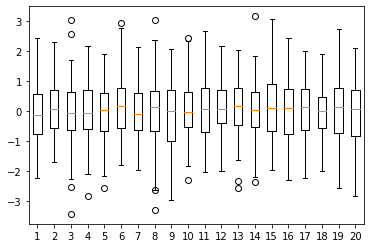

In [194]:
import matplotlib.pyplot as plt

#data1, data2, data3, data4, data5 = np.vsplit(data_xtrain, 5)
fig1, ax1 = plt.subplots()
ax1.boxplot(data_xtrain, whis = 1.5)

plt.show()

In [195]:
import pandas as pd

dfx = pd.DataFrame(data_xtrain)
dfy = pd.DataFrame(data_ytrain)

def find_iqr(x):
    return np.subtract(*np.percentile(x,[75,25]))

def find_q1(x):
    return np.percentile(x, 25)

def find_q3(x):
    return np.percentile(x, 75)

iqr = dfx.apply(find_iqr)
q1 = dfx.apply(find_q1)
q3 = dfx.apply(find_q3)

outliers = [];
for i in range(0, 19):
    upper_bound = q3[i]+(1.0*iqr[i])
    lower_bound = q1[i]-(1.0*iqr[i])
    #print(q1[i], q3[i], iqr[i], lower_bound, upper_bound)
    for j in range(0, 99):
        if (dfx[i][j] <= lower_bound) | (dfx[i][j] >= upper_bound):
            outliers.append([j, i, dfx[i][j]])
outliers.sort()
print(outliers)

[[0, 9, 2.328489417453243], [3, 5, 2.9344575838234985], [4, 18, 2.47256530781458], [6, 2, -1.9053280738006788], [7, 4, -2.1578238047982867], [7, 7, -3.3101509950236854], [8, 11, -1.542629910114985], [9, 16, -2.240194402523111], [10, 11, -1.7151379437154821], [10, 13, 1.8324787152438755], [12, 5, 2.175521593366721], [12, 7, -2.6323450535440616], [12, 9, -2.286954541364484], [12, 11, -1.6864545879262376], [12, 17, -2.0065964483823757], [15, 0, -2.109172457729528], [15, 15, 2.223575372359559], [17, 17, 1.4993654274388766], [21, 2, -2.5208633037239103], [22, 11, -1.620608022903857], [23, 7, -2.0609504129822973], [23, 13, 3.159330545381251], [24, 3, -2.099261517419817], [27, 14, 2.729318484711566], [29, 6, 2.049063926467389], [29, 7, 2.1279251307950195], [31, 9, 2.243455197625492], [31, 11, -2.0175025806022413], [31, 12, -2.5842876480686563], [31, 13, -1.9308526003964872], [31, 14, 2.521463358237163], [32, 1, 1.9888140517501556], [36, 2, -3.4333287519999747], [39, 1, 2.2909803240426494], [4

In [196]:
final_Xtrain = np.delete(data_xtrain, [12, 15, 31, 59, 61, 71, 84, 97], axis=0)
final_Ytrain = np.delete(data_ytrain, [12, 15, 31, 59, 61, 71, 84, 97], axis=0)

In [197]:
#Regression

In [198]:
#Functions
def Get_score(model, X_train, X_validation, y_train, y_validation):
    model.fit(X_train, y_train)
    return model.score(X_validation, y_validation)

def Predict_val(model, X_train, X_validation, y_train):
    model.fit(X_train, y_train)
    return model.predict(X_validation)

def Average(lst):
    return sum(lst) / len(lst)

In [215]:
#K-Fold Cross Validation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE

kfold = KFold(10)

scores_LR = [];
mse_LR = [];
scores_R = [];
mse_R = [];
scores_L = [];
mse_L = [];

for train_index, validate_index in kfold.split(final_Xtrain, final_Ytrain):
    X_train, X_validation = final_Xtrain[train_index], final_Xtrain[validate_index]
    y_train, y_validation = final_Ytrain[train_index], final_Ytrain[validate_index]
    scores_LR.append(Get_score(LinearRegression(), X_train, X_validation, y_train, y_validation))
    scores_R.append(Get_score(Ridge(alpha = 4.4), X_train, X_validation, y_train, y_validation)) #alpha values obtained further on
    scores_L.append(Get_score(Lasso(alpha = 0.056352705410821644), X_train, X_validation, y_train, y_validation))
    mse_LR.append(MSE(y_validation, Predict_val(LinearRegression(), X_train, X_validation, y_train)))
    mse_R.append(MSE(y_validation, Predict_val(Ridge(alpha = 4.4), X_train, X_validation, y_train)))
    mse_L.append(MSE(y_validation, Predict_val(Lasso(alpha = 0.056352705410821644), X_train, X_validation, y_train))) 

print("Average of scores_LR:", Average(scores_LR))
print("Average of scores_R:", Average(scores_R))
print("Average of scores_L:", Average(scores_L))
print("Average of mse_LR:", Average(mse_LR))
print("Average of mse_R:", Average(mse_R))
print("Average of mse_L:", Average(mse_L))

Average of scores_LR: 0.7418981772288328
Average of scores_R: 0.7487658636581564
Average of scores_L: 0.7543736843030123
Average of mse_LR: 2.366683235294815
Average of mse_R: 2.3230347570126595
Average of mse_L: 2.240787732331242


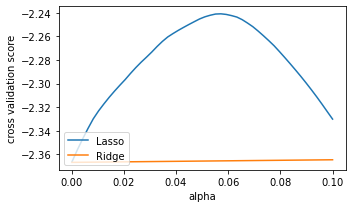

In [200]:
#Another K-Fold Cross Validation (compare alpha values of Ridge and Lasso and plots)
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

alphas = np.linspace(0.0001, 0.1, 50)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), final_Xtrain, final_Ytrain, cv=10, scoring='neg_mean_squared_error').mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

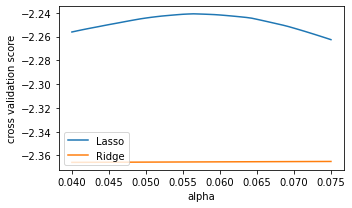

In [210]:
#second plot - small alpha range
alphas = np.linspace(0.04, 0.075, 50)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), final_Xtrain, final_Ytrain, cv=10, scoring='neg_mean_squared_error').mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

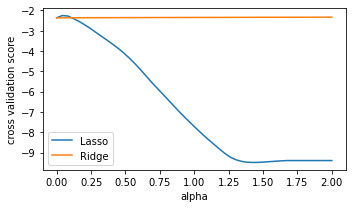

In [202]:
#third plot - higher alpha values
alphas = np.linspace(0.0001, 2, 50)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), final_Xtrain, final_Ytrain, cv=10, scoring='neg_mean_squared_error').mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

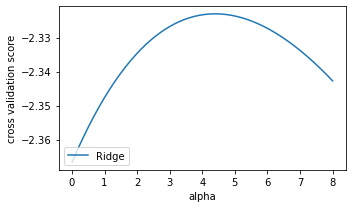

In [203]:
#fourth plot - just Ridge
alphas = np.linspace(0.0001, 8, 50)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(Ridge(alpha), final_Xtrain, final_Ytrain, cv=10, scoring='neg_mean_squared_error').mean() 
          for alpha in alphas]
plt.plot(alphas, scores, label=Ridge.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

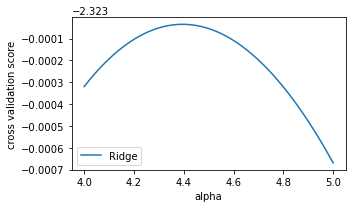

In [212]:
#fifth plot - Ridge with small alpha range
alphas = np.linspace(4, 5, 50)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(Ridge(alpha), final_Xtrain, final_Ytrain, cv=10, scoring='neg_mean_squared_error').mean() 
          for alpha in alphas]
plt.plot(alphas, scores, label=Ridge.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [214]:
#Another K-Fold Cross Validation (using RidgeCV e LassoCV and getting the best alpha value)
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

alphas = np.linspace(4, 6, 500) #?????????????????????
regressorR = RidgeCV(alphas=alphas, cv=10)
regressorR.fit(final_Xtrain, final_Ytrain)
print(regressorR.alpha_) 
#alpha is 3.366633266533066

alphas = np.linspace(0.04, 0.06, 500)
regressorL = LassoCV(alphas=alphas, cv=10)
regressorL.fit(final_Xtrain, final_Ytrain.ravel())
print(regressorL.alpha_) 
#alpha is 0.051142284569138274

5.342685370741483
0.056352705410821644


In [206]:
#Final prediction
final_regressor = Lasso(alpha = 0.051142284569138274)
final_regressor.fit(final_Xtrain, final_Ytrain)
final_regressor.coef_
final_results = final_regressor.predict(data_xtest)
np.save('data2.npy', final_results)